In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score

In [13]:
df = pd.read_csv('../data/processed/mushrooms_pca.csv')
y = df['class']
X = df.drop(columns=['class']).values
X.view()

array([[ 0.24373845,  0.16963259,  0.18727096, ..., -0.2621439 ,
        -0.04811481,  0.10087257],
       [ 1.5713711 , -0.39656834,  0.45390158, ..., -0.11453773,
         0.41043087, -0.28486641],
       [ 0.01171017,  0.71284725, -0.7501287 , ...,  0.00313137,
        -0.25922659, -0.06733154],
       ...,
       [-0.89697748, -0.1697835 ,  0.3055329 , ...,  0.53583814,
         0.06813399, -0.06614521],
       [-1.88993255, -0.39236622, -0.58529202, ...,  0.1682014 ,
         0.37251319, -0.41726506],
       [ 0.66668421,  0.4509778 , -0.09989701, ..., -0.18299176,
        -0.0747118 , -0.36911983]])

## Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {'n_neighbors': range(5,51,4)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='f1', cv=10, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(5, 51, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [81]:
print(clf.best_estimator_)
print(clf.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')
0.8033618126892508


In [82]:
import pickle
pickle.dump(clf, open( "../models/knn-7.p", "wb" ) )

In [83]:
results = pd.DataFrame(clf.cv_results_)
results.head()

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.124431,0.026206,3.652681,0.033359,5,{'n_neighbors': 5},0.515298,0.750000,0.857862,0.862291,...,0.885999,0.884782,0.893777,0.894828,0.885483,0.889306,0.894323,0.890017,0.892305,0.006354
1,0.104312,0.015293,3.812370,0.202859,9,{'n_neighbors': 9},0.491694,0.773154,0.876747,0.875969,...,0.871758,0.871146,0.878744,0.881184,0.874436,0.872600,0.880483,0.876540,0.879094,0.007865
2,0.095203,0.011380,4.072282,0.041324,13,{'n_neighbors': 13},0.488136,0.782967,0.876884,0.892068,...,0.864611,0.863630,0.875219,0.871157,0.866520,0.865055,0.874166,0.872340,0.872623,0.008547
3,0.115569,0.021750,4.408835,0.152479,17,{'n_neighbors': 17},0.475382,0.777931,0.881313,0.886866,...,0.861058,0.863536,0.867969,0.866519,0.860304,0.862919,0.871131,0.864520,0.868009,0.008191
4,0.092216,0.006314,3.706356,0.027537,21,{'n_neighbors': 21},0.468750,0.784916,0.885787,0.884265,...,0.855667,0.855585,0.866598,0.863390,0.858326,0.859970,0.865930,0.859312,0.863766,0.008531


Text(0.5, 1.0, 'k-NN performance')

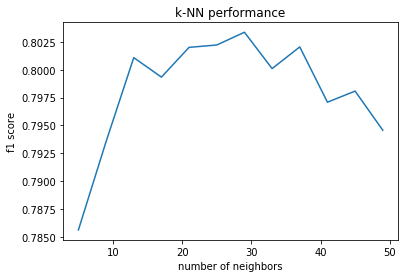

In [84]:
neighbors = list(map(lambda x: x['n_neighbors'] ,results['params']))
f1scores = results['mean_test_score']
plt.plot(neighbors, f1scores)
plt.xlabel('number of neighbors')
plt.ylabel('f1 score')
plt.title('k-NN performance')